Shape of dataset: (4269, 13)

First 5 rows:
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0               

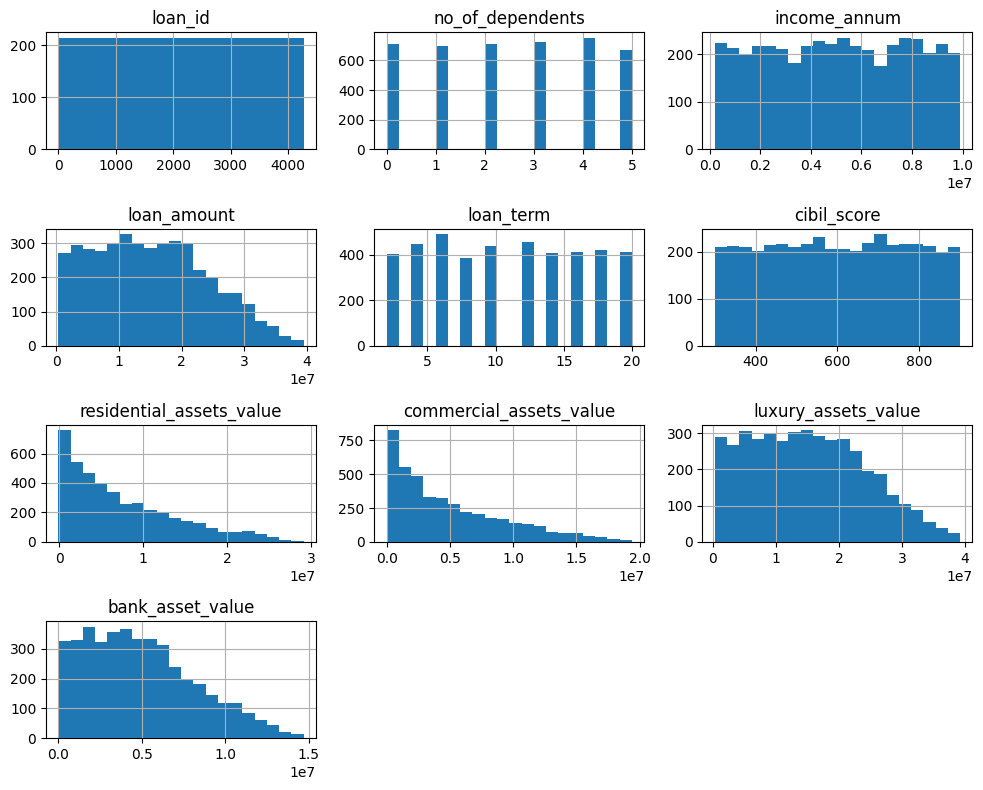

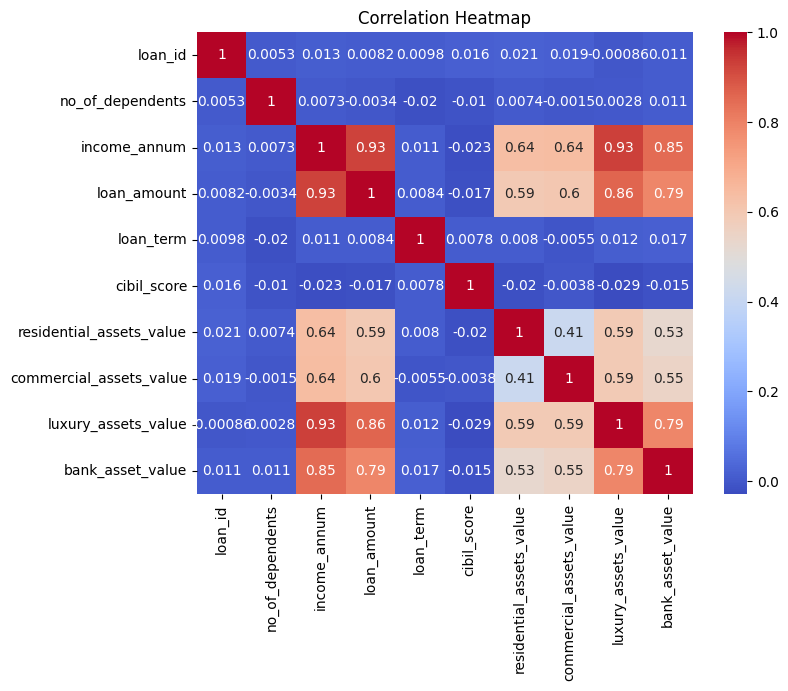

In [4]:
# 01_EDA.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Load dataset
data_path = os.path.join("..", "data", "loan.csv")
df = pd.read_csv(data_path)
df.columns = df.columns.str.strip() 
# Show basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Class distribution
if "Loan_Status" in df.columns:
    print("\nClass distribution:")
    print(df["Loan_Status"].value_counts())
    sns.countplot(x="Loan_Status", data=df)
    plt.title("Loan Status Distribution")
    plt.show()

# Numeric columns histogram
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap (numeric only)
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
